# Exercise 4

This week we will practice how to conduct data classification and aggregation using geopandas. Last week in exercise 3 we analyzed buffer zones around shopping centers. This week we will take into account travel distances using data from the [Helsinki Region Travel Time Matrix](https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix/).


## Problem 1: Join accessibility datasets into a grid and visualize the data on a map (10 points)


![P1 example result](img/traveltimes_example.png)

*Desired output from problem 1: Travel times by public transport (PT) and car to Itis and Myyrmanni*

**Data:**

The [data/](data/) directory in this repository contains all the required input data for this exercise:
 
- Travel time data: `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` (Travel times and distances in the Helsinki Region to different shopping centers  as text files)
- Reference grid: `MetropAccess_YKR_grid_EurefFIN.shp`. 

Column `from_id` in the travel time data sets corresponds to the `YKR_ID` column in the grid shapefile.
     
**Steps:**

In problem 1 we will focus on travel times to **Itis** and **Myyrmanni**. Our goal is to visualize travel times by public transport and car to both shopping centers. Before plotting the maps we need to classify the data. Your task is to **first develop the processing steps using Itis as input**, and then repeat the steps for Myyrmanni.

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


- Read the Polygon grid `MetropAccess_YKR_grid_EurefFIN.shp` into a GeoDataFrame called `grid` using geopandas:

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# File paths
grid_fp = "data/MetropAccess_YKR_grid_EurefFIN.shp"

# Read files
grid = gpd.read_file(grid_fp)

In [3]:
grid

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."
...,...,...,...,...
13226,372875.0,6665630.0,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6..."
13227,373125.0,6665630.0,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6..."
13228,372375.0,6665380.0,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6..."
13229,372625.0,6665380.0,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6..."


In [4]:
# NON-EDITABLE TEST CELL
# Check the data
print("\nYKR GRID: {len(grid)} rows")


YKR GRID: {len(grid)} rows


- Read the travel time data file for Itis using Pandas into a variable called `data`. Separator is `";"` in the input file.
- Select only following columns from the file:
    
   - `pt_r_t`
   - `car_r_t`
   - `from_id`
   - `to_id`

In [5]:
# Filepath
fp = "data/TravelTimes_to_5944003_Itis.txt"

# Read the data
data = pd.read_csv(fp, sep=';')

# Select rows
data = data[['pt_r_t', 'car_r_t', 'from_id', 'to_id']]
data.head()

,pt_r_t,car_r_t,from_id,to_id
0,132,50,5785640,5944003
1,135,51,5785641,5944003
2,137,58,5785642,5944003
3,141,57,5785643,5944003
4,125,50,5787544,5944003


In [6]:
# NON-EDITABLE TEST CELL
# Check the data
print(f"\nITIS: {len(data)} rows")


ITIS: 13231 rows


- join attributes from `data` to `grid` using the [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) function: 
  - **`YKR_ID`** -column in `grid` corresponds to the **`from_id`** column in `data`
  - store the join output into a variable called `data_geo` 

In [7]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data_geo = grid.merge(data,how='left', left_on='YKR_ID', right_on='from_id')

data_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",132,50,5785640,5944003
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",135,51,5785641,5944003
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",137,58,5785642,5944003
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",141,57,5785643,5944003
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",125,50,5787544,5944003


In [8]:
type(data_geo)

geopandas.geodataframe.GeoDataFrame

In [9]:
# NON-EDITABLE TEST CELL
#Check data type
assert type(data_geo) == gpd.geodataframe.GeoDataFrame, "Output should be a geodataframe."

In [10]:
# NON-EDITABLE TEST CELL
# Check that the merged output have (at least) the necessary columns
required_columns = ['YKR_ID', 'pt_r_t', 'car_r_t', 'geometry']

assert all(x in data_geo.columns for x in required_columns), "Couldn't find all required columns."

- Remove all rows containing no-data values (`-1`) from `data_geo`. You can for example [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the no-data values with numpy's `np.nan`, and then drop rows containing no-data values using the [DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function.

In [11]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE 
# Source: https://github.com/PaulH97/AutoGIS2020/blob/main/Exercise-4-problem-1.ipynb
import numpy

data_geo = data_geo.replace(-1, numpy.nan)

data_geo = data_geo.dropna(axis=0, how='all')

In [12]:
# NON-EDITABLE TEST CELL
# Check that -1 values are not present in the columns
assert -1 not in data_geo["pt_r_t"], "NoData values (-1) should be removed from the data!"


In [13]:
data_geo

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",132.0,50.0,5785640,5944003.0
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",135.0,51.0,5785641,5944003.0
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",137.0,58.0,5785642,5944003.0
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",141.0,57.0,5785643,5944003.0
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",125.0,50.0,5787544,5944003.0
...,...,...,...,...,...,...,...,...
13226,372875.0,6665630.0,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",79.0,60.0,6016698,5944003.0
13227,373125.0,6665630.0,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",81.0,62.0,6016699,5944003.0
13228,372375.0,6665380.0,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6...",NaN,NaN,6018252,NaN
13229,372625.0,6665380.0,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",84.0,61.0,6018253,5944003.0


- Classify the travel times for both travel modes (public transport and private car) into five-minute intervals 
    - Create a `UserDefined` classifier using the [pysal/mapclassify](https://github.com/pysal/mapclassify#userdefined) library using these class breaks: `5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60`
    - Apply the classifier to `pt_r_t` and `car_r_t` columns and store the results to `pt_r_t_cl` and `car_r_t_cl` columns, respectively
    - Notice that these 12 class breaks will produce 13 classes (1 class break divides the data into two classes).

In [14]:
pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


In [15]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import mapclassify

classifier = mapclassify.UserDefined.make(bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]) 

data_geo['pt_r_t_cl'] = data_geo[['pt_r_t']].apply(classifier)
data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)

data_geo.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id,pt_r_t_cl,car_r_t_cl
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",132.0,50.0,5785640,5944003.0,12,9
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",135.0,51.0,5785641,5944003.0,12,10
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",137.0,58.0,5785642,5944003.0,12,11
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",141.0,57.0,5785643,5944003.0,12,11
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",125.0,50.0,5787544,5944003.0,12,9


In [16]:
# NON-EDITABLE TEST CELL
#Check the output
print("travel times by public transport:")
print(data_geo[['YKR_ID', 'pt_r_t', 'pt_r_t_cl']].head())

travel times by public transport:
    YKR_ID  pt_r_t  pt_r_t_cl
0  5785640   132.0         12
1  5785641   135.0         12
2  5785642   137.0         12
3  5785643   141.0         12
4  5787544   125.0         12


In [17]:
# NON-EDITABLE TEST CELL
#Check the output
print("Travel times by car:")
print(data_geo[['YKR_ID','car_r_t', 'car_r_t_cl']].head())

Travel times by car:
    YKR_ID  car_r_t  car_r_t_cl
0  5785640     50.0           9
1  5785641     51.0          10
2  5785642     58.0          11
3  5785643     57.0          11
4  5787544     50.0           9


**Plot the classified travel times to Itis**:

![itis_example.png](img/itis_example.png)

Create a 1x2 plot where the you plot travel times by public transport and travel times by car to Itis:
- Create subplots using matplotlib having 1 row and 2 columns (use parameters `nrows` & `ncols`), and the figure size should be 10 inches by 5 inches (use parameter `figsize`)
- Add titles for the subplots as seen in the example above
- Remove the empty whitespace around the plots using function `plt.tight_layout()`
- Save the figure into disk with filename `itis_accessibility.png`


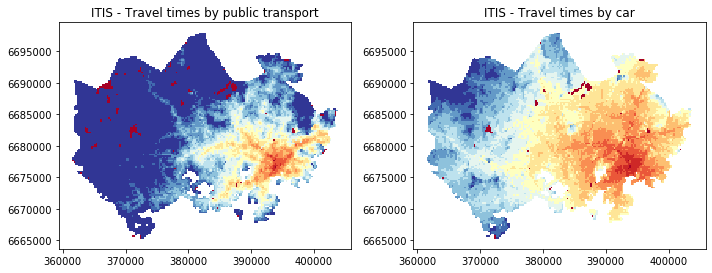

In [18]:
# Define output filename for the figure in here and use it when saving the file:
output_fig1 = "itis_accessibility.png"

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
%matplotlib inline 
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

data_geo.plot(ax=ax1, column="pt_r_t_cl", k=9, cmap="RdYlBu", linewidth=0)

ax1.set_title("ITIS - Travel times by public transport");

data_geo.plot(ax=ax2, column="car_r_t_cl", k=9, cmap="RdYlBu", linewidth=0)

ax2.set_title("ITIS - Travel times by car");

plt.tight_layout()

plt.savefig(output_fig1)

In [19]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
import os
assert os.path.isfile(output_fig1), "figure does not exists!"

**Repeat the steps for Myyrmanni:**

![myyrmanni example figure](img/myyrmanni_example.png)

Next, your task is to repeat all the same steps for **Myyrmanni** (`data/TravelTimes_to_5902043_Myyrmanni.txt`):

    # Read text file using pandas into a variable called data
    # Select columns 'pt_r_t', 'car_r_t', 'from_id', 'to_id'
    # Make table join between grid and travel time data. Store output in a variable called data_geo
    # Remove no data values
    # Classify the values in columns 'pt_r_t', 'car_r_t' into new columns 'pt_r_t_cl', 'car_r_t_cl'
    # Plot travel times by public transport and travel times by car.
    # Save output image to file (myyrmanni_accessibility.png)

*Hint: You can copy paste the code from your earlier solutions in here, just change the input file path.*


In [20]:
# Define output filename for the figure in here and use it when saving the file:
output_fig2 = "myyrmanni_accessibility.png"

# Read text file using pandas into a variable called data
fp1 = "data/TravelTimes_to_5902043_Myyrmanni.txt"

data = pd.read_csv(fp1, sep=';')

# Select columns 'pt_r_t', 'car_r_t', 'from_id', 'to_id'
data = data[['pt_r_t', 'car_r_t', 'from_id', 'to_id']]
data.head()

,pt_r_t,car_r_t,from_id,to_id
0,90,39,5785640,5902043
1,93,39,5785641,5902043
2,95,47,5785642,5902043
3,99,51,5785643,5902043
4,83,38,5787544,5902043


In [21]:
# Make table join between grid and travel time data. Store output in a variable called data_geo
data_geo = grid.merge(data, how='left', left_on='YKR_ID', right_on='from_id')

data_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",90,39,5785640,5902043
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",93,39,5785641,5902043
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",95,47,5785642,5902043
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",99,51,5785643,5902043
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",83,38,5787544,5902043


In [22]:
# Remove no data values
data_geo = data_geo.replace(-1, numpy.nan)

data_geo = data_geo.dropna(axis=0, how='all')

In [23]:
# Classify the values in columns 'pt_r_t', 'car_r_t' into new columns 'pt_r_t_cl', 'car_r_t_cl'
classifier = mapclassify.UserDefined.make(bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]) 

data_geo['pt_r_t_cl'] = data_geo[['pt_r_t']].apply(classifier)
data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)

data_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id,pt_r_t_cl,car_r_t_cl
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",90.0,39.0,5785640,5902043.0,12,7
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",93.0,39.0,5785641,5902043.0,12,7
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",95.0,47.0,5785642,5902043.0,12,9
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",99.0,51.0,5785643,5902043.0,12,10
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",83.0,38.0,5787544,5902043.0,12,7


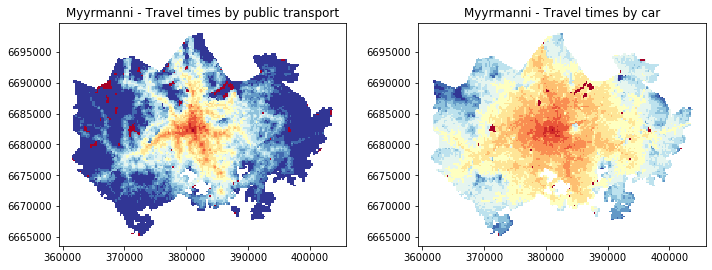

In [24]:
# Plot travel times by public transport and travel times by car.
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

data_geo.plot(ax=ax1, column="pt_r_t_cl", k=9, cmap="RdYlBu", linewidth=0)

ax1.set_title("Myyrmanni - Travel times by public transport");

data_geo.plot(ax=ax2, column="car_r_t_cl", k=9, cmap="RdYlBu", linewidth=0)

ax2.set_title("Myyrmanni - Travel times by car");

plt.tight_layout()

plt.savefig(output_fig2)

In [25]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
import os
assert os.path.isfile(output_fig2), "figure does not exists!"


**Optional:  4-panel figure**

As an optional task, plot travel times to Itis and Myyrmanni all in one 4-panel figure (see example at the top of this page)!

Hints:
- create a for-loop where you repeat all the steps for Itis and Myyrmanni (you can iterate over a list of input filepaths)
- Before the for-loop, create a figure with 4 subplots (2 rows and 2 columns) and use figsize=(10,10)
- Inside the for-loop, plot each map into one of the subplots. 
- save the figure as `shopping_center_accessibility.png` 

In [26]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

NotImplementedError: 

**Finally**, check that you have provided adequate comments in your code.

**Reflections:** (Only for enrolled students)
- If you want to ask feedback on spesific parts of your code, please leave your comment in here: 

YOUR ANSWER HERE

### Done!


**Remember to commit the output figures** to your exercise repository! (One for Itis and one for Myyrmanni, or optionally a combined 4-panel figure for both shopping centers and both travel modes).

That's it! Once you have plotted the data and saved the output you are ready to continue with Problem 2.